<a href="https://colab.research.google.com/github/DaverArenas/DataAnalytics_Text/blob/main/DA_LimpiezaTexto_snscrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Limpieza de texto con tweets

In [1]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
import collections
import csv
import numpy as np
import re
import snscrape.modules.twitter as sntwitter
import itertools
from datetime import date

@username se puede usar en la cadena de búsqueda para buscar aquellos tweets que mencionan ese usuario.

Esto, unido con -from:username puede dar los tweets que lo mencionan, quitando los que ellos mismos mencionan, en idioma español.

Por ejemplo, para buscar los tweets que hablan de CanalRCN, pero no las noticias que ellos mismos ponen, podemos hacer una búsqueda así:

In [ ]:
username='CanalRCN'
from_date = '2022-06-01'
end_date=date.today()
search='@"{}" -from:"{}" lang:es since:"{}" until:"{}"'.format(username,username,from_date,end_date)

In [ ]:
df_RCN = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(search).get_items(), 5000))

In [ ]:
len(df_RCN)

5000

In [ ]:
df_RCN

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,https://twitter.com/mauronuma/status/155461657...,2022-08-02 23:54:09+00:00,@pulzo @petrogustavo Perdón @MauricioLizcano n...,1554616573301665792,mauronuma,[],,[],
1,https://twitter.com/AltairPR/status/1554616085...,2022-08-02 23:52:12+00:00,@TVCritica2017 @BlogRumoreS @CanalRCN @Telemun...,1554616085609078784,AltairPR,[],,[],
2,https://twitter.com/AltairPR/status/1554615783...,2022-08-02 23:51:00+00:00,@TVCritica2017 @BlogRumoreS @CanalRCN @Telemun...,1554615783036272640,AltairPR,[],,[],
3,https://twitter.com/mcardonarene/status/155461...,2022-08-02 23:48:44+00:00,@TVCritica2017 @BlogRumoreS @CanalRCN @Telemun...,1554615211725934594,mcardonarene,[],,[],
4,https://twitter.com/MaiteBowen/status/15546142...,2022-08-02 23:44:54+00:00,Avance de #factorx en las noches por #CanalRC...,1554614248063606790,MaiteBowen,[],,[],
...,...,...,...,...,...,...,...,...,...
4995,https://twitter.com/Pavel11604545/status/15459...,2022-07-10 04:10:46+00:00,@CanalRCN Menos la cosa llamada Isabela,1545983844666466307,Pavel11604545,[],,[],
4996,https://twitter.com/LiliaVanegas5/status/15459...,2022-07-10 04:06:56+00:00,@CanalRCN Manuela,1545982881977229313,LiliaVanegas5,[],,[],
4997,https://twitter.com/davidvirguez/status/154598...,2022-07-10 04:04:14+00:00,@Clauval1256 @CanalRCN @Masterchef_Co jajaja y...,1545982203720605696,davidvirguez,[],,[],
4998,https://twitter.com/Pavel11604545/status/15459...,2022-07-10 04:03:02+00:00,@CanalRCN @carogomezfilm Esa cosa llamada Isab...,1545981899751018496,Pavel11604545,[],,[],


In [ ]:
##Convertimos la fecha a la hora local
df_RCN.date = df_RCN.date.dt.tz_convert('America/Bogota')

In [ ]:
df_RCN.head()

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,https://twitter.com/mauronuma/status/155461657...,2022-08-02 18:54:09-05:00,@pulzo @petrogustavo Perdón @MauricioLizcano n...,1554616573301665792,mauronuma,[],,[],
1,https://twitter.com/AltairPR/status/1554616085...,2022-08-02 18:52:12-05:00,@TVCritica2017 @BlogRumoreS @CanalRCN @Telemun...,1554616085609078784,AltairPR,[],,[],
2,https://twitter.com/AltairPR/status/1554615783...,2022-08-02 18:51:00-05:00,@TVCritica2017 @BlogRumoreS @CanalRCN @Telemun...,1554615783036272640,AltairPR,[],,[],
3,https://twitter.com/mcardonarene/status/155461...,2022-08-02 18:48:44-05:00,@TVCritica2017 @BlogRumoreS @CanalRCN @Telemun...,1554615211725934594,mcardonarene,[],,[],
4,https://twitter.com/MaiteBowen/status/15546142...,2022-08-02 18:44:54-05:00,Avance de #factorx en las noches por #CanalRC...,1554614248063606790,MaiteBowen,[],,[],


In [ ]:
min(df_RCN.date)

Timestamp('2022-07-09 23:02:46-0500', tz='America/Bogota')

## Guardar los datos en un CSV

In [5]:
path='/content/drive/MyDrive/Datasets/'

In [ ]:
df_RCN.to_csv(path+'SearchRCNTV_.csv', encoding='utf-8-sig')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Cargar los datos de un CSV

In [6]:
df=pd.read_csv(path+'SearchRCNTV_.csv', encoding='utf-8-sig')

In [7]:
df.head()

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,0,https://twitter.com/mauronuma/status/155461657...,2022-08-02 18:54:09-05:00,@pulzo @petrogustavo Perdón @MauricioLizcano n...,1554616573301665792,mauronuma,[],NaN,[],NaN
1,1,https://twitter.com/AltairPR/status/1554616085...,2022-08-02 18:52:12-05:00,@TVCritica2017 @BlogRumoreS @CanalRCN @Telemun...,1554616085609078784,AltairPR,[],NaN,[],NaN
2,2,https://twitter.com/AltairPR/status/1554615783...,2022-08-02 18:51:00-05:00,@TVCritica2017 @BlogRumoreS @CanalRCN @Telemun...,1554615783036272640,AltairPR,[],NaN,[],NaN
3,3,https://twitter.com/mcardonarene/status/155461...,2022-08-02 18:48:44-05:00,@TVCritica2017 @BlogRumoreS @CanalRCN @Telemun...,1554615211725934594,mcardonarene,[],NaN,[],NaN
4,4,https://twitter.com/MaiteBowen/status/15546142...,2022-08-02 18:44:54-05:00,Avance de #factorx en las noches por #CanalRC...,1554614248063606790,MaiteBowen,[],NaN,[],NaN


## WordCloud

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [9]:
df.content

0       @pulzo @petrogustavo Perdón @MauricioLizcano n...
1       @TVCritica2017 @BlogRumoreS @CanalRCN @Telemun...
2       @TVCritica2017 @BlogRumoreS @CanalRCN @Telemun...
3       @TVCritica2017 @BlogRumoreS @CanalRCN @Telemun...
4       Avance de #factorx  en las noches por #CanalRC...
                              ...                        
4995              @CanalRCN Menos la cosa llamada Isabela
4996                                    @CanalRCN Manuela
4997    @Clauval1256 @CanalRCN @Masterchef_Co jajaja y...
4998    @CanalRCN @carogomezfilm Esa cosa llamada Isab...
4999    Amor por el deporte Colombiano 🇨🇴🇨🇴💛💙❤️\n\nYa ...
Name: content, Length: 5000, dtype: object

In [10]:
text = ' '.join(txt for txt in df.content)
len(text)

704549

(-0.5, 399.5, 199.5, -0.5)

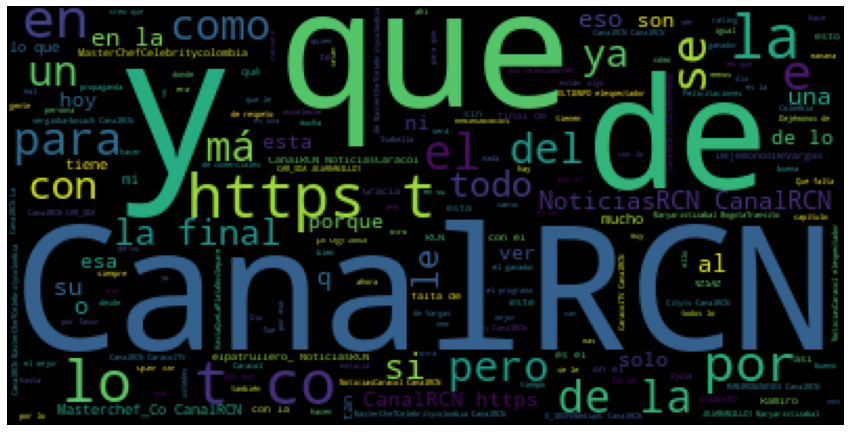

In [11]:
wordcloud = WordCloud().generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud) 
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

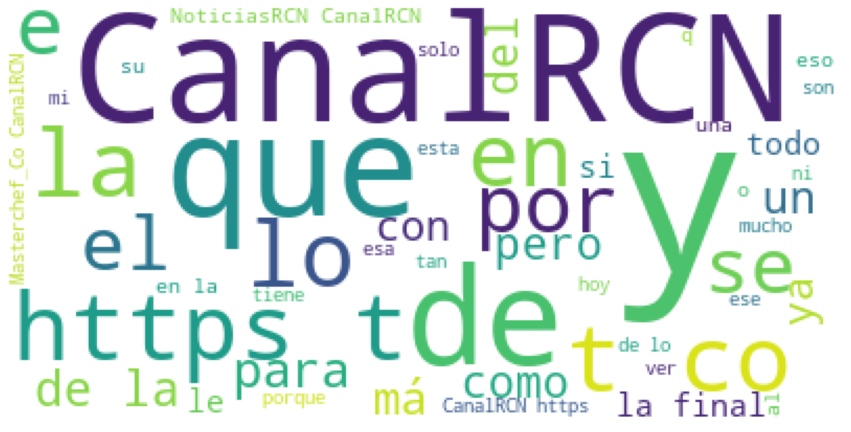

In [ ]:
wordcloud = (WordCloud(background_color="white", 
                      max_words=50) 
                      .generate(text))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud) 
plt.axis("off")

In [ ]:
type(wordcloud)

wordcloud.wordcloud.WordCloud

##FRECUENCIA DE LAS PALABRAS

In [12]:
df_freq = pd.DataFrame.from_dict(data = wordcloud.words_, orient='index')
df_freq

,0
y,1.000000
CanalRCN,0.924295
que,0.854527
de,0.749629
https t,0.409203
...,...
MasterChefCelebrity CanalRCN,0.024740
han,0.024245
CanalRCN Muy,0.024245
sí,0.023751


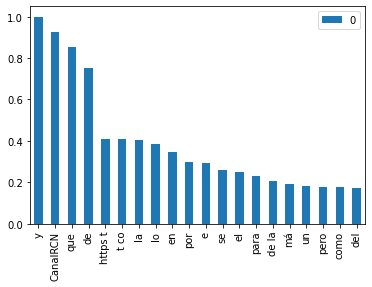

In [13]:
df_freq = df_freq.head(20)
df_freq.plot.bar()

Podemos dividir los textos en palabras y contarlos.

Podemos llevar a minúsculas primero y luego hacer una separación de todo los textos juntos en palabras.

In [14]:
words_in_tweet =text.lower().split()

In [15]:
counts_words = collections.Counter(words_in_tweet)
words_top=counts_words.most_common(10)
words, freqs = zip(*counts_words.most_common()[:10])
for w,q in zip(words, freqs):
  print(w,'\t',q)

@canalrcn 	 4891
de 	 3997
que 	 2883
la 	 2493
y 	 2280
el 	 1900
a 	 1883
no 	 1511
en 	 1397
los 	 1157


In [16]:
counts_words.most_common()

[('@canalrcn', 4891),
 ('de', 3997),
 ('que', 2883),
 ('la', 2493),
 ('y', 2280),
 ('el', 1900),
 ('a', 1883),
 ('no', 1511),
 ('en', 1397),
 ('los', 1157),
 ('es', 1149),
 ('por', 1039),
 ('se', 990),
 ('con', 902),
 ('lo', 787),
 ('para', 674),
 ('un', 651),
 ('#masterchefcelebritycolombia', 553),
 ('las', 548),
 ('del', 504),
 ('una', 498),
 ('me', 443),
 ('final', 442),
 ('más', 380),
 ('como', 378),
 ('su', 355),
 ('le', 352),
 ('si', 351),
 ('@caracoltv', 350),
 ('ya', 346),
 ('pero', 340),
 ('@noticiasrcn', 338),
 ('al', 323),
 ('muy', 308),
 ('q', 264),
 ('ver', 255),
 ('esta', 253),
 ('#masterchefcelebrity', 251),
 ('ese', 241),
 ('o', 241),
 ('esa', 238),
 ('son', 237),
 ('@noticiascaracol', 235),
 ('@masterchef_co', 228),
 ('eso', 218),
 ('@elpatrullero_', 213),
 ('hoy', 213),
 ('les', 208),
 ('qué', 198),
 ('ni', 198),
 ('este', 197),
 ('está', 196),
 ('programa', 196),
 ('tan', 194),
 ('porque', 194),
 ('todos', 190),
 ('sus', 186),
 ('mi', 185),
 ('@citytv', 185),
 ('@ram

<BarContainer object of 10 artists>

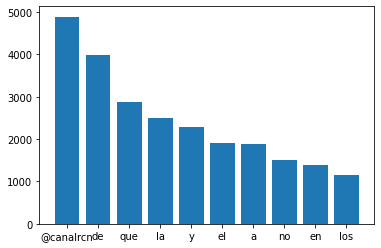

In [17]:
plt.bar(list(words), list(freqs))

In [18]:
import plotly.express as px
fig = px.bar(x=list(words), y=list(freqs))
fig.show()

In [ ]:
# Python3 program to check
# URL is valid or not
# using regular expression
import re
 
# Function to validate URL
# using regular expression
def isValidURL(str):
 
    # Regex to check valid URL
    regex = ("((http|https)://)(www.)?" +
             "[a-zA-Z0-9@:%._\\+~#?&//=]" +
             "{2,256}\\.[a-z]" +
             "{2,6}\\b([-a-zA-Z0-9@:%" +
             "._\\+~#?&//=]*)")
     
    # Compile the ReGex
    p = re.compile(regex)
 
    # If the string is empty
    # return false
    if (str == None):
        return False
 
    # Return if the string
    # matched the ReGex
    if(re.search(p, str)):
        return True
    else:
        return False

In [ ]:
correo = "contacto@parzibyte.me"
if "@" in correo:
	print("Es válido")
else:
	print("No es válido")

In [ ]:
import re
"""
	Usar expresiones regulares para ver si es un correo electrónico válido en Python
	Recuerda importar el módulo re
	Por cierto, está probado con Python 3, si usas la versión 2 y no funciona, no trates
	de adaptarlo, mejor actualiza tu versión
	@author parzibyte
"""
 
 
def es_correo_valido(correo):
    expresion_regular = r"(?:[a-z0-9!#$%&'*+/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&'*+/=?^_`{|}~-]+)*|\"(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21\x23-\x5b\x5d-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])*\")@(?:(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?|\[(?:(?:(2(5[0-5]|[0-4][0-9])|1[0-9][0-9]|[1-9]?[0-9]))\.){3}(?:(2(5[0-5]|[0-4][0-9])|1[0-9][0-9]|[1-9]?[0-9])|[a-z0-9-]*[a-z0-9]:(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21-\x5a\x53-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])+)\])"
    return re.match(expresion_regular, correo) is not None

In [ ]:
es_correo_valido('arenas_vs@hotmail.com')

True

In [ ]:
es_correo_valido('arenas_vshotmail.com')

False

## Uso de expresiones regulares

Con una expresión regular podemos buscar las menciones de usuarios que en Twitter comienzan con @.

Si tenemos los datos en un dataframe este tiene algunas funciones para, a partir de una expresión regular, buscar patrones, sustituir textos.

str.contains(exp_regular): Devuelve verdero si encuentra el patrón en el texto

str.findall(exp_regular): Devuelve la lista de los patrones encontrados.

In [ ]:
##Buscar en una columna en python una expresión regular. Nos devuelve falso y verdadero dependiendo si encuentra el patrón
df.content.str.contains(r'@\w+') #El tweet menciona a algun usuario

0        True
1        True
2        True
3        True
4       False
        ...  
4995     True
4996     True
4997     True
4998     True
4999     True
Name: content, Length: 5000, dtype: bool

In [19]:
screen_names_list=df.content.str.findall(r"@\w+").sum()# Aplanar la lista

In [ ]:
screen_names_list

In [ ]:
df.content[1]

'@TVCritica2017 @BlogRumoreS @CanalRCN @Telemundo Ya habían hecho un refrito, ¿no?'

In [ ]:
re.findall('@\w+', df.content[1])

['@TVCritica2017', '@BlogRumoreS', '@CanalRCN', '@Telemundo']

In [21]:
##Creamos una nueva columna con las menciones que encontró en el tuiter o 'content' 
df['mentions'] = df['content'].apply(lambda x: re.findall('@\w+', x))

In [22]:
##Creamos una nueva columna con los hashtags que encontró en el tuiter o 'content' 
df['hashtag'] = df['content'].apply(lambda x: re.findall('#\w+', x))

In [23]:
df

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,mentions,hashtag
0,0,https://twitter.com/mauronuma/status/155461657...,2022-08-02 18:54:09-05:00,@pulzo @petrogustavo Perdón @MauricioLizcano n...,1554616573301665792,mauronuma,[],NaN,[],NaN,"[@pulzo, @petrogustavo, @MauricioLizcano, @Pir...",[]
1,1,https://twitter.com/AltairPR/status/1554616085...,2022-08-02 18:52:12-05:00,@TVCritica2017 @BlogRumoreS @CanalRCN @Telemun...,1554616085609078784,AltairPR,[],NaN,[],NaN,"[@TVCritica2017, @BlogRumoreS, @CanalRCN, @Tel...",[]
2,2,https://twitter.com/AltairPR/status/1554615783...,2022-08-02 18:51:00-05:00,@TVCritica2017 @BlogRumoreS @CanalRCN @Telemun...,1554615783036272640,AltairPR,[],NaN,[],NaN,"[@TVCritica2017, @BlogRumoreS, @CanalRCN, @Tel...",[]
3,3,https://twitter.com/mcardonarene/status/155461...,2022-08-02 18:48:44-05:00,@TVCritica2017 @BlogRumoreS @CanalRCN @Telemun...,1554615211725934594,mcardonarene,[],NaN,[],NaN,"[@TVCritica2017, @BlogRumoreS, @CanalRCN, @Tel...",[]
4,4,https://twitter.com/MaiteBowen/status/15546142...,2022-08-02 18:44:54-05:00,Avance de #factorx en las noches por #CanalRC...,1554614248063606790,MaiteBowen,[],NaN,[],NaN,[],"[#factorx, #CanalRCN]"
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,https://twitter.com/Pavel11604545/status/15459...,2022-07-09 23:10:46-05:00,@CanalRCN Menos la cosa llamada Isabela,1545983844666466307,Pavel11604545,[],NaN,[],NaN,[@CanalRCN],[]
4996,4996,https://twitter.com/LiliaVanegas5/status/15459...,2022-07-09 23:06:56-05:00,@CanalRCN Manuela,1545982881977229313,LiliaVanegas5,[],NaN,[],NaN,[@CanalRCN],[]
4997,4997,https://twitter.com/davidvirguez/status/154598...,2022-07-09 23:04:14-05:00,@Clauval1256 @CanalRCN @Masterchef_Co jajaja y...,1545982203720605696,davidvirguez,[],NaN,[],NaN,"[@Clauval1256, @CanalRCN, @Masterchef_Co]",[#sparrow]
4998,4998,https://twitter.com/Pavel11604545/status/15459...,2022-07-09 23:03:02-05:00,@CanalRCN @carogomezfilm Esa cosa llamada Isab...,1545981899751018496,Pavel11604545,[],NaN,[],NaN,"[@CanalRCN, @carogomezfilm]",[]


In [25]:
screen_names = set(df.mentions.sum())
screen_names

{'@veryanalizar',
 '@hcarog11',
 '@Eunice_Yepes',
 '@FabioAristiA',
 '@anacrisrestrepo',
 '@Mariafe78094862',
 '@avianca',
 '@LizcanoCharles',
 '@MastercardCol',
 '@Mafalda_2020_',
 '@HastaElFinalCon',
 '@JoseA_Ocampo',
 '@coviandinasas',
 '@Col_Informa',
 '@LuisFSuarezV',
 '@SectorMovilidad',
 '@BlogRumoreS',
 '@policiasdetransito',
 '@UnoDe100000',
 '@Sebas_AraujoV',
 '@osacar1115',
 '@MirandaSuspLo',
 '@CasandraAnam',
 '@ferrojasparra',
 '@Clauuudiiitaaa0',
 '@jwilloc_v',
 '@PauFresneda',
 '@Emilianitto03',
 '@CarlosRuge',
 '@NoticiasCaracol',
 '@Arrechosconlac1',
 '@liclemevi',
 '@Inesmzabarain',
 '@SaVanessCa',
 '@garl',
 '@solmarydvnc',
 '@JEJARAMILLO1',
 '@TMcolombia_news',
 '@MiguelsotohSoto',
 '@masmusicafm',
 '@Herrera211C',
 '@GustavoBolivar',
 '@Alejand36202857',
 '@canalrcn',
 '@Matador000',
 '@BomberosBogota',
 '@mamutsalsa',
 '@kamilog3',
 '@SebasJaramillob',
 '@baaaadillo',
 '@Angiezamora2017',
 '@millersoto',
 '@Asobares',
 '@MelisaMarArtuz',
 '@nicoleregnier11',
 '@La

In [26]:
tweets_names = pd.DataFrame()
for name in screen_names:
  tweets_names[name.replace('@', '')] = df.content.str.contains(name)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



In [27]:
tweets_names

,veryanalizar,hcarog11,Eunice_Yepes,FabioAristiA,anacrisrestrepo,Mariafe78094862,avianca,LizcanoCharles,MastercardCol,Mafalda_2020_,...,ELTIEMPO,Ciudadverde9,nicolaspetroB,coltelevision,programa,alcaldiachia,ManjarBlanco_,patriciapizzo,yrma37,Lafarandulacri1
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
words, freqs=np.unique(np.array(screen_names_list),return_counts=True)

In [29]:
fig = px.bar(x=words, y=freqs)
fig.show()

In [30]:
name_counts = tweets_names.sum(axis=0).sort_values(ascending=False)

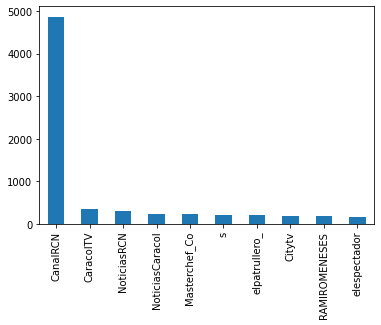

In [31]:
name_counts[0:10].plot.bar()

## Uso de expresiones regulares para limpiar texto
Los textos siempre tienen ruido que nos impiden hacer un buen análisis del mismo. Por eso, lo primero que normalmente hacemos es una limpieza del texto eliminando de él todo aquello que no influye en entender de qué trata.

1.   Eliminamos las URL
2.   Eliminamos correos electrónicos
2.   Eliminamos hashtags
2.   Eliminamos menciones que se suelen hacer con @Nombre
2.   Eliminamos los números

patternURLEMAIL=r'
((\w+\.)*\w+@(\w+\.)+\w+)
|
(
  (http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?\w+([\-\.]{1}\w+)*\.[a-z]{2,5}(\/)?(([^\s@])*(\/)?)*
  )'

In [32]:
##Esta función recibe un dataframe y una columna

from string import punctuation
def  clean_text(df, text_field):
  patternURLEMAIL=r'(\w+[.]?\w+@(\w+\.)+\w+)|((http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?\w+([\-\.]{1}\w+)*\.[a-z]{2,5}(\/)?(([^\s@])*(\/)?)*)'
  patternHashtagMention=r'(@\w+)|(#\w+)'
  #Primero convertimos a minúscula
  df[text_field] = df[text_field].str.lower()
  # Utilizamos las expresiones regulares anteriores sobre URL, email, hashtag y menciones para quitarlos
  ##SUSTITUIMOS EL PATRÓN DETERMINADO POR UN ESPACIO EN BLANCO. AQUI ELIMINAMOS URL O EMAILS USANDO LA FUNCIÓN SUB
  df[text_field] = df[text_field].apply(lambda elem: re.sub(patternURLEMAIL,'', elem))  
  # Utilizamos una expresión regular para eliminar los hashtag y las menciones con @
  df[text_field] = df[text_field].apply(lambda elem: re.sub(patternHashtagMention,'', elem))
  # Utilizamos una expresión regular también para eliminar los signos de mayor que y menor que
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'(\&gt\;)|(\&lt\;)','', elem))
  # Utilizamos una expresión regular también para eliminar a.m y p.m cuando mencionan horas
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'(a\.m)|(p\.m)','', elem))
  # Utilizamos una expresión regular también para eliminar los números O LOS DIGITOS
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'\d+','', elem))
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'[|]','', elem))
  ## Sustituir espacios de más
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'\s+',' ', elem))
  ## Eliminar signos de puntuación '[!#?,.:";]'
  #df[text_field] = df[text_field].apply(lambda elem: re.sub(r"""[‘’]""",' ', elem))
  non_words = list(punctuation) ##LISTA CON SIGNOS DE PUNTUACIÓN
  non_words.extend(['¿', '¡', '‘', '’']) ##EXTENDEMOS LA LISTA ANTERIOR CON OTROS SIGNOS DE PUNTUACIÓN
  df[text_field] = df[text_field].apply(lambda elem: ''.join([c for c in elem if c not in non_words]))
  return df

In [ ]:
list(punctuation)

In [ ]:
df=pd.read_csv(path+'SearchRCNTV_.csv', encoding='utf-8-sig')

In [ ]:
##df.head()

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,mentions,hashtag
0,0,https://twitter.com/mauronuma/status/155461657...,2022-08-02 18:54:09-05:00,@pulzo @petrogustavo Perdón @MauricioLizcano n...,1554616573301665792,mauronuma,[],NaN,[],NaN,"[@pulzo, @petrogustavo, @MauricioLizcano, @Pir...",[]
1,1,https://twitter.com/AltairPR/status/1554616085...,2022-08-02 18:52:12-05:00,@TVCritica2017 @BlogRumoreS @CanalRCN @Telemun...,1554616085609078784,AltairPR,[],NaN,[],NaN,"[@TVCritica2017, @BlogRumoreS, @CanalRCN, @Tel...",[]
2,2,https://twitter.com/AltairPR/status/1554615783...,2022-08-02 18:51:00-05:00,@TVCritica2017 @BlogRumoreS @CanalRCN @Telemun...,1554615783036272640,AltairPR,[],NaN,[],NaN,"[@TVCritica2017, @BlogRumoreS, @CanalRCN, @Tel...",[]
3,3,https://twitter.com/mcardonarene/status/155461...,2022-08-02 18:48:44-05:00,@TVCritica2017 @BlogRumoreS @CanalRCN @Telemun...,1554615211725934594,mcardonarene,[],NaN,[],NaN,"[@TVCritica2017, @BlogRumoreS, @CanalRCN, @Tel...",[]
4,4,https://twitter.com/MaiteBowen/status/15546142...,2022-08-02 18:44:54-05:00,Avance de #factorx en las noches por #CanalRC...,1554614248063606790,MaiteBowen,[],NaN,[],NaN,[],"[#factorx, #CanalRCN]"


##EN ESTE DATAFRAME LOGRAMOS ELIMINAR LAS MENCIONES, HASHTAGS Y DÉMAS PALABRAS QUE NO QUERIAMOS EN EL TEXTO

In [33]:
##USAMOS LA FUNCIÓN CON UNA COPIA DEL DATAFRAME
df_clean = clean_text(df.copy(), 'content')
df_clean.head(6)

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,mentions,hashtag
0,0,https://twitter.com/mauronuma/status/155461657...,2022-08-02 18:54:09-05:00,perdón no fue el mismo q hizo botar a del por...,1554616573301665792,mauronuma,[],NaN,[],NaN,"[@pulzo, @petrogustavo, @MauricioLizcano, @Pir...",[]
1,1,https://twitter.com/AltairPR/status/1554616085...,2022-08-02 18:52:12-05:00,ya habían hecho un refrito no,1554616085609078784,AltairPR,[],NaN,[],NaN,"[@TVCritica2017, @BlogRumoreS, @CanalRCN, @Tel...",[]
2,2,https://twitter.com/AltairPR/status/1554615783...,2022-08-02 18:51:00-05:00,nunca pude ver esa novela dicen que es buenísima,1554615783036272640,AltairPR,[],NaN,[],NaN,"[@TVCritica2017, @BlogRumoreS, @CanalRCN, @Tel...",[]
3,3,https://twitter.com/mcardonarene/status/155461...,2022-08-02 18:48:44-05:00,y todos unos fiascos,1554615211725934594,mcardonarene,[],NaN,[],NaN,"[@TVCritica2017, @BlogRumoreS, @CanalRCN, @Tel...",[]
4,4,https://twitter.com/MaiteBowen/status/15546142...,2022-08-02 18:44:54-05:00,avance de en las noches por,1554614248063606790,MaiteBowen,[],NaN,[],NaN,[],"[#factorx, #CanalRCN]"
5,5,https://twitter.com/coltelevision/status/15546...,2022-08-02 18:40:34-05:00,no no y no va a tener el mismo destino de fra...,1554613155334160384,coltelevision,[],NaN,[],NaN,"[@BlogRumoreS, @CanalRCN, @Telemundo]",[#HastaQueLaPlataNosSepare]


## StopWords

La biblioteca Natural Language Toolkit (NLTK) tiene funciones para eliminar stopwords en diferentes idiomas.

In [34]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [35]:
stop

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [36]:
df_clean['content'] = df_clean['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_clean.head()

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,mentions,hashtag
0,0,https://twitter.com/mauronuma/status/155461657...,2022-08-02 18:54:09-05:00,perdón mismo q hizo botar investigación volteo...,1554616573301665792,mauronuma,[],NaN,[],NaN,"[@pulzo, @petrogustavo, @MauricioLizcano, @Pir...",[]
1,1,https://twitter.com/AltairPR/status/1554616085...,2022-08-02 18:52:12-05:00,hecho refrito,1554616085609078784,AltairPR,[],NaN,[],NaN,"[@TVCritica2017, @BlogRumoreS, @CanalRCN, @Tel...",[]
2,2,https://twitter.com/AltairPR/status/1554615783...,2022-08-02 18:51:00-05:00,nunca pude ver novela dicen buenísima,1554615783036272640,AltairPR,[],NaN,[],NaN,"[@TVCritica2017, @BlogRumoreS, @CanalRCN, @Tel...",[]
3,3,https://twitter.com/mcardonarene/status/155461...,2022-08-02 18:48:44-05:00,fiascos,1554615211725934594,mcardonarene,[],NaN,[],NaN,"[@TVCritica2017, @BlogRumoreS, @CanalRCN, @Tel...",[]
4,4,https://twitter.com/MaiteBowen/status/15546142...,2022-08-02 18:44:54-05:00,avance noches,1554614248063606790,MaiteBowen,[],NaN,[],NaN,[],"[#factorx, #CanalRCN]"


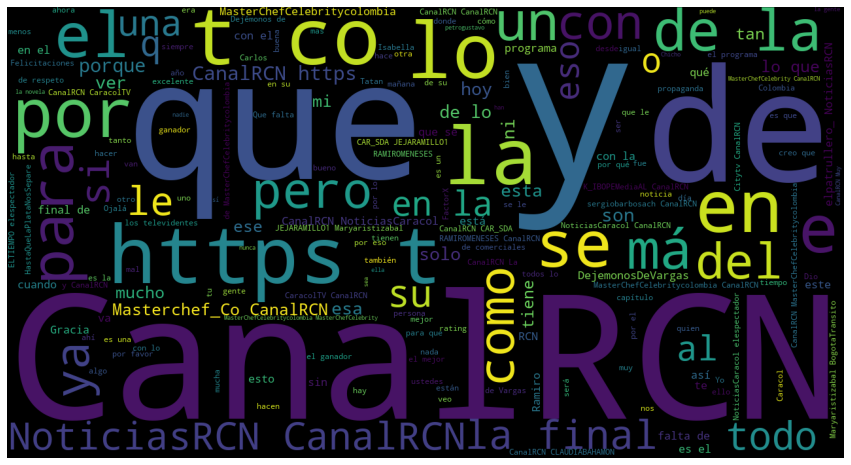

In [37]:
##GENERAMOS NUEVAMENTE UNA NUBE DE PALABRAS
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text = ' '.join(txt for txt in df.content)
wordcloud = WordCloud(width=1280, height=690).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()

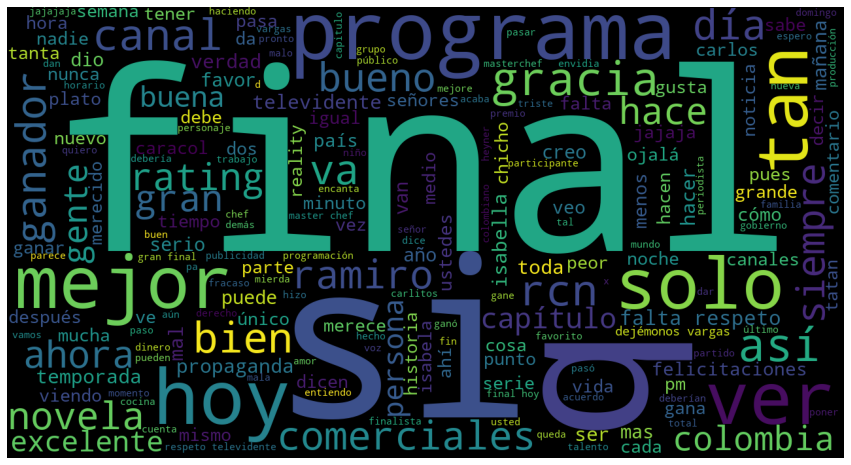

In [38]:
##NUBE DE PALABRAS DESPUES DE ELIMINAR LAS QUE NO QUEREMOS
text = ' '.join(txt for txt in df_clean.content)
wordcloud = WordCloud(width=1280, height=690).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()

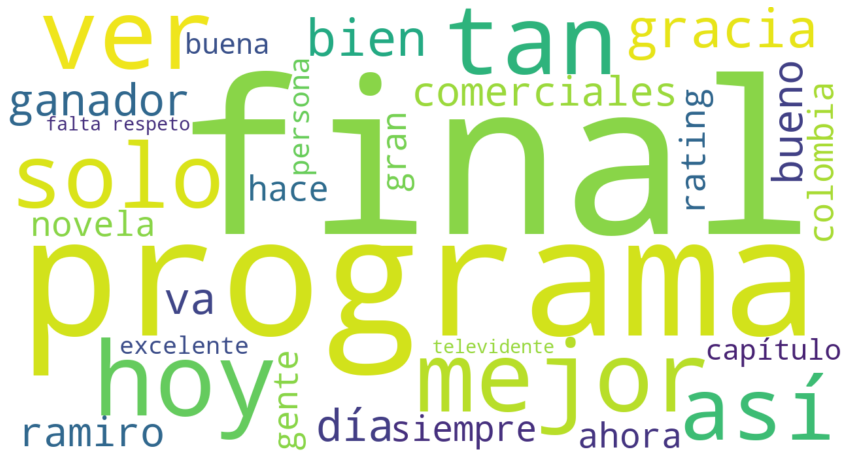

In [39]:
##PODEMOS AGREGAR AL STOP AQUELLAS PALABRAS QUE SABEMOS QUE NO NOS SIRVEN, Y QUE QUEREMOS ELIMINAR
stop.extend(['rcn','si', 'q', 'canal'])
df_clean['content'] = df_clean['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
text = ' '.join(txt for txt in df_clean.content)
wordcloud = WordCloud(background_color="white", max_words=30, contour_width=5, contour_color='steelblue', width=1280, height=690)
wordcloud.generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Eliminar emojis

In [40]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 7.3 MB/s 
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=84fb40a2ccdbd3b09f9fecb8cb838af90d28c4740e93fccf134288fa9f79412c
  Stored in directory: /root/.cache/pip/wheels/ec/29/4d/3cfe7452ac7d8d83b1930f8a6205c3c9649b24e80f9029fc38
Successfully built emoji


In [41]:
import emoji

In [42]:
emoji.EMOJI_DATA

{'🥇': {'E': 3,
  'de': ':goldmedaille:',
  'en': ':1st_place_medal:',
  'es': ':medalla_de_oro:',
  'fr': ':médaille_d’or:',
  'it': ':medaglia_d’oro:',
  'pt': ':medalha_de_ouro:',
  'status': 2},
 '🥈': {'E': 3,
  'de': ':silbermedaille:',
  'en': ':2nd_place_medal:',
  'es': ':medalla_de_plata:',
  'fr': ':médaille_d’argent:',
  'it': ':medaglia_d’argento:',
  'pt': ':medalha_de_prata:',
  'status': 2},
 '🥉': {'E': 3,
  'de': ':bronzemedaille:',
  'en': ':3rd_place_medal:',
  'es': ':medalla_de_bronce:',
  'fr': ':médaille_de_bronze:',
  'it': ':medaglia_di_bronzo:',
  'pt': ':medalha_de_bronze:',
  'status': 2},
 '🆎': {'E': 0.6,
  'alias': [':ab:'],
  'de': ':großbuchstaben_ab_in_rotem_quadrat:',
  'en': ':AB_button_(blood_type):',
  'es': ':grupo_sanguíneo_ab:',
  'fr': ':groupe_sanguin_ab:',
  'it': ':gruppo_sanguigno_ab:',
  'pt': ':botão_ab_(tipo_sanguíneo):',
  'status': 2},
 '🏧': {'E': 0.6,
  'alias': [':atm:'],
  'de': ':symbol_geldautomat:',
  'en': ':ATM_sign:',
  'es': ':s

In [43]:
df_clean['content'][100]

'presentación anoche puede ver página rcn😅'

In [ ]:
##De esta manera eliminamos el emoji y lo reemplazamos por un espacio en blanco
emoji.replace_emoji(df_clean['content'][100], '')

'presentación anoche puede ver página rcn'

In [ ]:
df_clean['content'][18]

'mude mismisima 💩 💩 💩 💩 💩'

In [ ]:
##Con esta función de emoji reemplazamos el emoji por la descripción de emojis que trae la libreria
emoji.demojize(df_clean['content'][18], language='es')

'mude mismisima :caca_con_ojos: :caca_con_ojos: :caca_con_ojos: :caca_con_ojos: :caca_con_ojos:'

In [ ]:
emoji.get_emoji_regexp().findall(df_clean['content'][0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'



['🤦\u200d♀️', '🤬']

In [ ]:
listEmoji=emoji.emoji_list(df_clean['content'][0])
listEmoji

[{'emoji': '🤦\u200d♀️', 'match_end': 4, 'match_start': 0},
 {'emoji': '🤬', 'match_end': 5, 'match_start': 4}]

In [ ]:
emoji.emoji_list(df_clean['content'][1])

[]

Si sólo quiero el primero de la lista

In [ ]:
[x['emoji'] for x in listEmoji]

['🤦\u200d♀️', '🤬']

In [44]:
df_clean['emojis']=df_clean['content'].apply(lambda text: [x['emoji'] for x in emoji.emoji_list(text)])

In [ ]:
df_clean['emojis'].head()

0    [🤦‍♀️, 🤬]
1           []
2           []
3           []
4           []
Name: emojis, dtype: object

In [ ]:
emoji.replace_emoji(df_clean['content'][0],'')

' nota rejunte info mal ensamblada cuántas bobadas publican pasar vergüenza msj william borró minutos telenovela éxito dsd estreno vio x dsd'

In [ ]:
emoji.demojize(df_clean['content'][0],language='es')

':mujer_con_la_mano_en_la_frente::cara_con_símbolos_en_la_boca: nota rejunte info mal ensamblada cuántas bobadas publican pasar vergüenza msj william borró minutos telenovela éxito dsd estreno vio x dsd'

In [ ]:
df_clean['content'][12]

'cachos dedico semana 😭💔'

In [ ]:
df['content'][12]

'@julian_mattt cachos en te la Dedico por @CanalRCN está semana 😭💔'

In [ ]:
emoji.demojize(df_clean['content'][12],language='es')

'cachos dedico semana :cara_llorando_fuerte::corazón_roto:'

In [45]:
def remove_emoji(text):
  return emoji.replace_emoji(text,'')

In [ ]:
remove_emoji(df_clean['content'][0])

' nota rejunte info mal ensamblada cuántas bobadas publican pasar vergüenza msj william borró minutos telenovela éxito dsd estreno vio x dsd'

In [46]:
df_clean['tweet']=df_clean['content'].apply(lambda text: remove_emoji(text))

In [47]:
df_clean['tweet']=df_clean['tweet'].apply(lambda elem: re.sub(r'\s+',' ', elem))

In [48]:
df_clean['tweet']=df_clean['tweet'].apply(lambda elem: re.sub(r'^\s+|\s+$','', elem))

In [49]:
emoji.demojize(df_clean['content'][0],language='es')

'perdón mismo hizo botar investigación volteo tierras adueñarse terrenos eje cafetero senador partido u jefe empalme crean tan toche'

In [50]:
def replace_emojis(text):
  return emoji.demojize(text,language='es')

In [51]:
df_clean['tweet_wE']=df_clean['content'].apply(lambda text: replace_emojis(text))

##EN ESTE DATASET TENEMOS UNA COLUMNA CON EMOJIS, SIN EMOJIS Y OTRA REEMPLAZANDO LOS EMOJIS POR SU DESCRIPCIÓN

In [52]:
df_clean[['content','tweet','tweet_wE']].head(10)

,content,tweet,tweet_wE
0,perdón mismo hizo botar investigación volteo t...,perdón mismo hizo botar investigación volteo t...,perdón mismo hizo botar investigación volteo t...
1,hecho refrito,hecho refrito,hecho refrito
2,nunca pude ver novela dicen buenísima,nunca pude ver novela dicen buenísima,nunca pude ver novela dicen buenísima
3,fiascos,fiascos,fiascos
4,avance noches,avance noches,avance noches
5,va tener mismo destino fracaso rotundo fotocop...,va tener mismo destino fracaso rotundo fotocop...,va tener mismo destino fracaso rotundo fotocop...
6,vieja tan fea,vieja tan fea,vieja tan fea
7,dañen novela refritos van oír,dañen novela refritos van oír,dañen novela refritos van oír
8,ver ver,ver ver,ver ver
9,naaahhh refritosque pereza,naaahhh refritosque pereza,naaahhh refritosque pereza


In [ ]:
df_clean['username']

0           mauronuma
1            AltairPR
2            AltairPR
3        mcardonarene
4          MaiteBowen
            ...      
4995    Pavel11604545
4996    LiliaVanegas5
4997     davidvirguez
4998    Pavel11604545
4999       jagarcia57
Name: username, Length: 5000, dtype: object

# Tokenización

Es el proceso de dividir el texto en tokens (palabras, bigramas, secuencias...)

In [53]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


##PRIMER PASO TOKENIZACION: CONVERTIR EL TEXTO EN UNA LISTA DE PALABRAS

In [54]:
df_clean['tokens'] = df_clean['tweet'].apply(lambda x: word_tokenize(x))
df_clean.head()

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,mentions,hashtag,emojis,tweet,tweet_wE,tokens
0,0,https://twitter.com/mauronuma/status/155461657...,2022-08-02 18:54:09-05:00,perdón mismo hizo botar investigación volteo t...,1554616573301665792,mauronuma,[],NaN,[],NaN,"[@pulzo, @petrogustavo, @MauricioLizcano, @Pir...",[],[],perdón mismo hizo botar investigación volteo t...,perdón mismo hizo botar investigación volteo t...,"[perdón, mismo, hizo, botar, investigación, vo..."
1,1,https://twitter.com/AltairPR/status/1554616085...,2022-08-02 18:52:12-05:00,hecho refrito,1554616085609078784,AltairPR,[],NaN,[],NaN,"[@TVCritica2017, @BlogRumoreS, @CanalRCN, @Tel...",[],[],hecho refrito,hecho refrito,"[hecho, refrito]"
2,2,https://twitter.com/AltairPR/status/1554615783...,2022-08-02 18:51:00-05:00,nunca pude ver novela dicen buenísima,1554615783036272640,AltairPR,[],NaN,[],NaN,"[@TVCritica2017, @BlogRumoreS, @CanalRCN, @Tel...",[],[],nunca pude ver novela dicen buenísima,nunca pude ver novela dicen buenísima,"[nunca, pude, ver, novela, dicen, buenísima]"
3,3,https://twitter.com/mcardonarene/status/155461...,2022-08-02 18:48:44-05:00,fiascos,1554615211725934594,mcardonarene,[],NaN,[],NaN,"[@TVCritica2017, @BlogRumoreS, @CanalRCN, @Tel...",[],[],fiascos,fiascos,[fiascos]
4,4,https://twitter.com/MaiteBowen/status/15546142...,2022-08-02 18:44:54-05:00,avance noches,1554614248063606790,MaiteBowen,[],NaN,[],NaN,[],"[#factorx, #CanalRCN]",[],avance noches,avance noches,"[avance, noches]"


In [55]:
##QUITAMOS PALABRAS CON LETRAS MENORES QUE 1 PALABRA
df_clean['tokens_clean']=df_clean['tokens']
df_clean['tokens_clean']=df_clean['tokens_clean'].apply(lambda text: [word for word in text if word.isalnum() and len(word)>1])

## Frecuencia de palabras
Después de quitar los stopwords, procemos a calcular la frecuencia de palablas

In [56]:
import itertools
import collections

In [57]:
all_words = list(itertools.chain(*df_clean['tokens_clean']))

In [58]:
##CONTAMOS LA CANTIDAD EXACTA QUE APARECE CADA PALABRA
counts_words = collections.Counter(all_words)
mostcommon_words=counts_words.most_common(35)
mostcommon_words

[('final', 574),
 ('ver', 273),
 ('hoy', 259),
 ('programa', 251),
 ('mejor', 197),
 ('tan', 195),
 ('ramiro', 193),
 ('solo', 174),
 ('gracias', 171),
 ('así', 166),
 ('falta', 165),
 ('gran', 156),
 ('va', 147),
 ('comerciales', 144),
 ('bien', 140),
 ('respeto', 140),
 ('ser', 137),
 ('ganador', 134),
 ('hace', 128),
 ('colombia', 126),
 ('siempre', 120),
 ('ahora', 111),
 ('temporada', 110),
 ('novela', 109),
 ('gente', 109),
 ('rating', 106),
 ('felicitaciones', 104),
 ('hacer', 103),
 ('isabella', 101),
 ('van', 99),
 ('mal', 97),
 ('buena', 95),
 ('televidente', 94),
 ('mañana', 94),
 ('verdad', 93)]

## Frecuencia de bigramas
#Para que sirven. Dos palabras que aparecen frecuentemente juntas

In [59]:
from nltk import bigrams
import networkx as nx
from nltk.util import ngrams

In [60]:
text = ' '.join(txt for txt in df_clean.tweet)
text

'perdón mismo hizo botar investigación volteo tierras adueñarse terrenos eje cafetero senador partido u jefe empalme crean tan toche hecho refrito nunca pude ver novela dicen buenísima fiascos avance noches va tener mismo destino fracaso rotundo fotocopias salen borrosas vieja tan fea dañen novela refritos van oír ver ver naaahhh refritosque pereza boca ay nadie responderá necesitan voluntaria escribirles telenovela top seguir haciendo remakes hermosa telenovela hermosos actores mark carolina escribo telenovela nueva quieren fracamizar lado mega fracaso junto cartel sapos caracol apuros pues productos estrella perra amargura tener soportarla mude mismisima telemundo coproducir funciona cafe plata desastre última sacaron aire sepan escoger bien pareja vea química plata separé gustó quitaron muchas personas engancharon tenaz triunfando nivel internacional ido bien según página realizarían nueva versión hija mariachi próximo año encanta papel gregorio pernía hace reír demásiado máximo oja

In [61]:
terms_bigram = [list(nltk.bigrams(t)) for t in df_clean.tokens_clean if t!=[]]

In [62]:
bigramsList = list(itertools.chain(*terms_bigram))
bigram_counts = collections.Counter(bigramsList)
bigram_counts.most_common(15)

[(('falta', 'respeto'), 101),
 (('dejémonos', 'vargas'), 40),
 (('master', 'chef'), 39),
 (('gran', 'final'), 36),
 (('final', 'hoy'), 28),
 (('respeto', 'televidente'), 26),
 (('darío', 'gómez'), 25),
 (('felicitaciones', 'ramiro'), 24),
 (('hoy', 'final'), 24),
 (('ramiro', 'meneses'), 22),
 (('ver', 'final'), 22),
 (('programas', 'tv'), 20),
 (('recta', 'final'), 19),
 (('top', 'programas'), 19),
 (('tv', 'aire'), 19)]

In [63]:
bigram_df = pd.DataFrame(bigram_counts.most_common(50),columns=['bigram', 'count'])

In [64]:
bigram_df

,bigram,count
0,"(falta, respeto)",101
1,"(dejémonos, vargas)",40
2,"(master, chef)",39
3,"(gran, final)",36
4,"(final, hoy)",28
5,"(respeto, televidente)",26
6,"(darío, gómez)",25
7,"(felicitaciones, ramiro)",24
8,"(hoy, final)",24
9,"(ramiro, meneses)",22


In [65]:
d = bigram_df.set_index('bigram').T.to_dict('records')

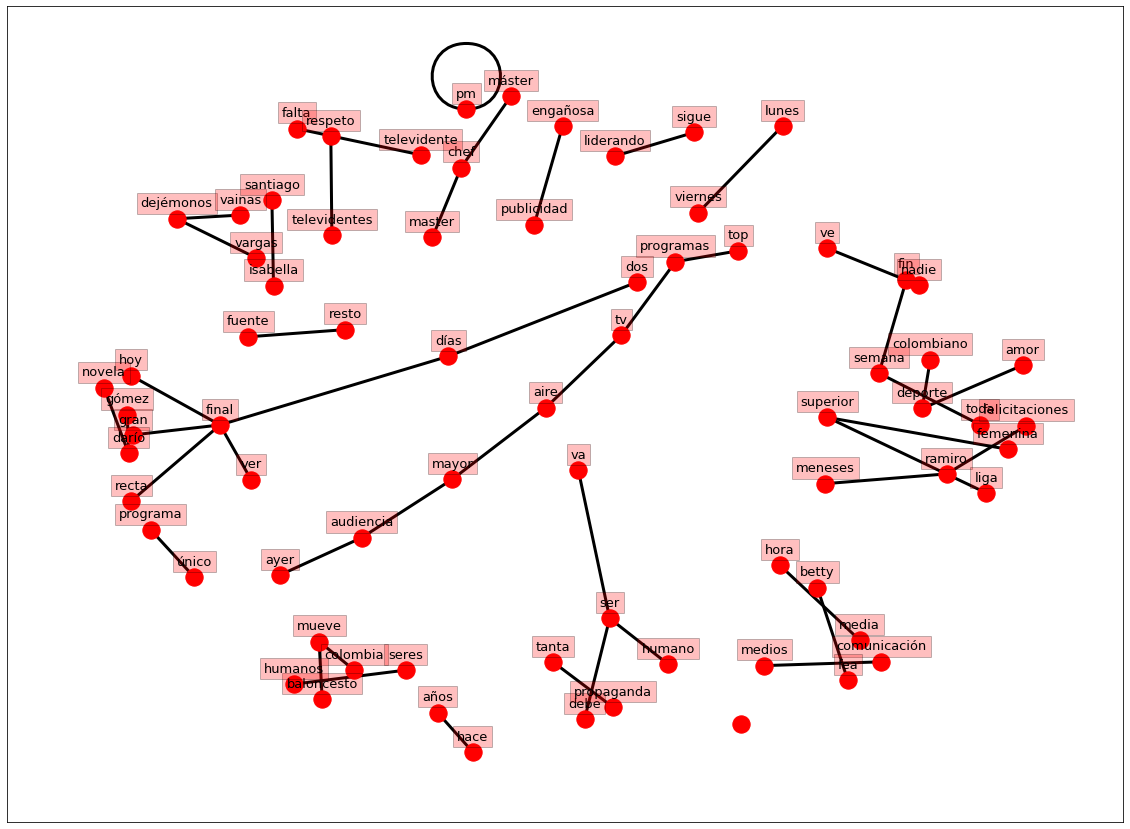

In [66]:
G = nx.Graph()
# Conecciones entre los nodos
for k, v in d[0].items():
  G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("", weight=100)
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(G, k=2)
nx.draw_networkx(G, pos,font_size=16,width=3,edge_color='black',node_color='red',with_labels = False,ax=ax)
for key, value in pos.items():
  x, y = value[0], value[1]+.035
  ax.text(x, y, s=key, bbox=dict(facecolor='red', alpha=0.25),horizontalalignment='center', fontsize=13)    
plt.show()

# Lematización (Lemmatization)
Es la acción de identificar en el texto, dada una forma flexionada, el lema correspondiente. 

Se entiende como forma flexionada de una palabra, el plural, femenino, o conjugación de un verbo.

El lema es la forma que representa todas las formas flexionadas de una misma palabra. 

Por ejemplo, el lema de una conjugación de un verbo es el verbo en infinitivo. De un sustantivo en plural, es el sustantivo en singular y masculino.

In [67]:
import spacy
!python -m spacy download es_core_news_sm # Descarga el modelo del lenguaje

2022-08-03 22:53:34.111092: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.9 MB 7.3 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


##En la siguiente descargamos la biblioteca en español

In [68]:
import es_core_news_sm
nlp = es_core_news_sm.load()

La descripción de las diferentes abreviaturas la puede encontrar en: https://spacy.io/api/annotation#pos-tagging

In [69]:
print(df_clean.tweet[0])
d=nlp(df_clean.tweet[0])
t=[[tok.text,tok.lemma_,tok.pos_,tok.ent_type_] for tok in d]
t

perdón mismo hizo botar investigación volteo tierras adueñarse terrenos eje cafetero senador partido u jefe empalme crean tan toche


[['perdón', 'perdón', 'NOUN', ''],
 ['mismo', 'mismo', 'ADJ', ''],
 ['hizo', 'hacer', 'VERB', ''],
 ['botar', 'botar', 'VERB', ''],
 ['investigación', 'investigación', 'NOUN', ''],
 ['volteo', 'volteo', 'VERB', ''],
 ['tierras', 'tierra', 'NOUN', ''],
 ['adueñarse', 'adueñar él', 'VERB', ''],
 ['terrenos', 'terreno', 'NOUN', ''],
 ['eje', 'eje', 'NOUN', ''],
 ['cafetero', 'cafetero', 'ADJ', ''],
 ['senador', 'senador', 'NOUN', ''],
 ['partido', 'partido', 'NOUN', ''],
 ['u', 'u', 'CCONJ', ''],
 ['jefe', 'jefe', 'NOUN', ''],
 ['empalme', 'empalme', 'ADJ', ''],
 ['crean', 'crear', 'VERB', ''],
 ['tan', 'tanto', 'ADV', ''],
 ['toche', 'toche', 'ADJ', '']]

Por ejemplo, detectar los sustantivos en un texto

In [70]:
for noun in d.noun_chunks:
  print(noun.text)

perdón mismo
investigación
tierras
terrenos
eje cafetero
senador partido
jefe


In [71]:
[[tok.lemma_] for tok in d]

[['perdón'],
 ['mismo'],
 ['hacer'],
 ['botar'],
 ['investigación'],
 ['volteo'],
 ['tierra'],
 ['adueñar él'],
 ['terreno'],
 ['eje'],
 ['cafetero'],
 ['senador'],
 ['partido'],
 ['u'],
 ['jefe'],
 ['empalme'],
 ['crear'],
 ['tanto'],
 ['toche']]

In [73]:
##Creamos otra columna y llevamos cada palabra original a su lema, o palabra base. Por ejemplo: Hizo --> Hacer
df_clean['lemmas'] = df_clean.tweet.apply(lambda text: [tok.lemma_ for tok in nlp(text)])

In [74]:
df_clean[['tweet','lemmas']].head()

,tweet,lemmas
0,perdón mismo hizo botar investigación volteo t...,"[perdón, mismo, hacer, botar, investigación, v..."
1,hecho refrito,"[hecho, refrito]"
2,nunca pude ver novela dicen buenísima,"[nunca, poder, ver, novela, decir, buenísimo]"
3,fiascos,[fiasco]
4,avance noches,"[avance, noches]"


In [75]:
allWords=[]
for l in df_clean.lemmas:
  allWords.extend(l)
wordDist = nltk.FreqDist(allWords)
wordDist.most_common(15)

[('ver', 584),
 ('final', 582),
 ('hacer', 449),
 ('ir', 368),
 ('programa', 308),
 ('tanto', 277),
 ('hoy', 259),
 ('decir', 252),
 ('mejor', 240),
 ('poder', 229),
 ('dar', 226),
 ('ser', 200),
 ('ganar', 194),
 ('pasar', 187),
 ('solo', 185)]

Algo interesante de este módulo es si usamos la frase completa, es capaz de hacer el análisis completo de la oración y podemos visualizar el gráfico de dependencias.

La lista de depndencias pueden verla aquí: 
https://universaldependencies.org/u/dep/index.html

In [76]:
ejemploOracion = nlp('El curso de analítica de datos de la Universidad EIA de la profesora Isis tiene un grupo de estudiantes muy brillantes')
spacy.displacy.render(ejemploOracion, style='dep', jupyter=True, options={'distance': 90})

Identificación de la entidades en el texto: 

En este ejemplo reconoce Persona: Isis y Organización: Universidad EIA

ENTIDADES: Organizaciones, personas, animales

In [77]:
[(e,  e.label_) for e in ejemploOracion.ents]

[(Universidad EIA, 'ORG'), (Isis, 'PER')]

# Radicalización (Stemming)
Stremming es el proceso de llevar las palabras a su forma raíz.

Después de dividido el texto en palabras, pasamos a hacer el stemming. Para hacerlo en idioma español debemos usar la librería SnowballStemmer, que permite varios lenguajes además del inglés.

##NO SE USA PARA ANALISIS DE SENTIMIENTOS EN ESPAÑOL. POR QUE ESTE MÉTODO CORTA LA PALABRA. TRATA DE DEJAR LA "RAIZ" DE LA PALABRA

In [78]:
from nltk.stem import PorterStemmer 
from nltk.stem.snowball import SnowballStemmer ## Para poder hacerlo con idiomas diferentes al inglés

##Se puede cargar para español o cualquier otro idioma

In [79]:
stemmer_spanish = SnowballStemmer("spanish")

In [80]:
df_clean['tokens_stem'] = df_clean['tokens'].apply(lambda text: [s for s in [stemmer_spanish.stem(i) for i in text] if s.isalpha() and len(s) > 1])

In [82]:
df_clean[['tokens','tokens_stem']].head(10)

,tokens,tokens_stem
0,"[perdón, mismo, hizo, botar, investigación, vo...","[perdon, mism, hiz, bot, investig, volte, tier..."
1,"[hecho, refrito]","[hech, refrit]"
2,"[nunca, pude, ver, novela, dicen, buenísima]","[nunc, pud, ver, novel, dic, buenisim]"
3,[fiascos],[fiasc]
4,"[avance, noches]","[avanc, noch]"
5,"[va, tener, mismo, destino, fracaso, rotundo, ...","[va, ten, mism, destin, fracas, rotund, fotoco..."
6,"[vieja, tan, fea]","[viej, tan, fea]"
7,"[dañen, novela, refritos, van, oír]","[dañ, novel, refrit, van, oir]"
8,"[ver, ver]","[ver, ver]"
9,"[naaahhh, refritosque, pereza]","[naaahhh, refritosqu, perez]"


In [83]:
path='/content/drive/My Drive/Analitics_Esp/'
df_clean.to_csv(path+'RCNTV_Clean.csv', encoding='utf-8-sig')

In [84]:
df = pd.read_csv(path+'RCNTV_Clean.csv', encoding='utf-8-sig')

# Bag of Words. Bolsa de palabras similares

In [85]:
import gensim
from gensim import corpora
import numpy as np

In [86]:
words=[]
for w in df_clean.lemmas:
  words.append(w)

In [87]:
words

[['perdón',
  'mismo',
  'hacer',
  'botar',
  'investigación',
  'volteo',
  'tierra',
  'adueñar él',
  'terreno',
  'eje',
  'cafetero',
  'senador',
  'partido',
  'u',
  'jefe',
  'empalme',
  'crear',
  'tanto',
  'toche'],
 ['hecho', 'refrito'],
 ['nunca', 'poder', 'ver', 'novela', 'decir', 'buenísimo'],
 ['fiasco'],
 ['avance', 'noches'],
 ['ir',
  'tener',
  'mismo',
  'destino',
  'fracaso',
  'rotundo',
  'fotocopia',
  'salir',
  'borrosa'],
 ['viejo', 'tanto', 'feo'],
 ['dañen', 'novela', 'refrito', 'ir', 'oír'],
 ['ver', 'ver'],
 ['naaahhh', 'refritoscar', 'pereza'],
 ['boca'],
 ['ay'],
 ['nadie', 'responder'],
 ['necesitar',
  'voluntario',
  'escribirl',
  'telenovelar',
  'top',
  'seguir',
  'hacer',
  'remakes'],
 ['hermoso', 'telenovelar', 'hermoso', 'actor', 'mark', 'carolina'],
 ['escribir', 'telenovela', 'nuevo', 'querer'],
 ['fracamizar',
  'lado',
  'megar',
  'fracaso',
  'junto',
  'cartel',
  'sapo',
  'caracol',
  'apuro',
  'pues',
  'producto',
  'estrell

In [88]:
dic=corpora.Dictionary(words)

In [89]:
bow_corpus = [dic.doc2bow(w) for w in words]

Crear un modelo para clasificar el texto

In [90]:
lda_model = gensim.models.LdaMulticore(bow_corpus,num_topics = 4, id2word = dic, passes = 20)
lda_model.show_topics()

[(0,
  '0.017*"hacer" + 0.012*"final" + 0.009*"tanto" + 0.007*"buen" + 0.006*"dar" + 0.006*"mejor" + 0.006*"bien" + 0.006*"gracias" + 0.005*"creer" + 0.004*"gran"'),
 (1,
  '0.022*"final" + 0.016*"ver" + 0.014*"ir" + 0.010*"hacer" + 0.009*"programa" + 0.007*"deber" + 0.006*"querer" + 0.006*"alargar" + 0.005*"…" + 0.005*"poder"'),
 (2,
  '0.024*"final" + 0.018*"ver" + 0.014*"hoy" + 0.014*"respeto" + 0.014*"programa" + 0.013*"faltar" + 0.013*"ganar" + 0.012*"decir" + 0.012*"comercial" + 0.010*"tanto"'),
 (3,
  '0.016*"ver" + 0.010*"ir" + 0.007*"hacer" + 0.007*"x" + 0.007*"así" + 0.006*"final" + 0.005*"solo" + 0.005*"poder" + 0.005*"bueno" + 0.005*"ahora"')]

In [91]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 7.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=706d7069c6d27554f3c03b4e62d767502d81b1f0a8b9b56bda78acd8982d26fd
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [92]:
import pyLDAvis.gensim_models

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working



In [93]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.004095 -0.007241       1        1  29.289508
2      0.143764  0.055707       2        1  29.059420
0     -0.021560 -0.134621       3        1  22.670321
3     -0.126299  0.086156       4        1  18.980751, topic_info=            Term        Freq       Total Category  logprob  loglift
1493     respeto  161.000000  161.000000  Default  30.0000  30.0000
197       faltar  153.000000  153.000000  Default  29.0000  29.0000
4247      ramiro  116.000000  116.000000  Default  28.0000  28.0000
239        ganar  171.000000  171.000000  Default  27.0000  27.0000
1267  propaganda  108.000000  108.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
172        pasar   26.270942  158.416360   Topic4  -5.6777  -0.1350
306          dar   27.253833  204.436083   Topic4  -5.6410  -0.3533
265       quedar   22.274911   79.418746   Topic4  -5.8427   0.3905
299        señor   20.413421   71.000831   Topic4  -5.9300   0.4152
473            …   19.935023   89.405709   Topic4  -5.9537   0.1610

[298 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
723       2  0.957076   abrazo
4219      2  0.969048   abusar
1613      1  0.955708    abuso
269       1  0.311999   acabar
269       2  0.204413   acabar
...     ...       ...      ...
694       4  0.893450  youtube
1060      1  0.923616    éxito
473       1  0.693468        …
473       3  0.078295        …
473       4  0.223699        …

[488 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 4])